In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import math
from scipy.interpolate import CubicSpline
from itertools import product
from sklearn.metrics import r2_score
import csv
from vmd import VMD

In [2]:
# adjusted R-squared
def r2_score_adjusted(y, y_pred, featurecount):
    n = len(y)
    return 1 - (1-r2_score(y, y_pred)) * (n-1)/(n-featurecount-1)

# AIC
def calculate_aic(y, y_pred, k):
    sse = np.sum((y - y_pred) ** 2)
    n = len(y)
    aic = n * np.log(sse / n) + 2 * k
    return aic

# BIC
def calculate_bic(y, y_pred, k):
    sse = np.sum((y - y_pred) ** 2)
    n = len(y)
    bic = n * np.log(sse / n) + k * np.log(n)
    return bic

# импорт временного ряда

In [3]:
# linux path
# path1 = './'
# path2 = '/'

# windows path
path1 = '.\\'
path2 = '\\'

In [4]:
seasonsTS = ("s10", "s10", "s10", "s10", "s10", "s10", "s10")
trendsTS = ("t1", "t2", "t3", "t4", "t5", "t6", "t7")
noisesTS = ("n1", "n1", "n1", "n1", "n1", "n1", "n1")

cases = ("t1_n1_s10", "t2_n1_s10", "t3_n1_s10", "t4_n1_s10", "t5_n1_s10", "t6_n1_s10", "t7_n1_s10")

In [13]:
# Trend = list()
# for trend_i in trendsTS:
#     t = pd.read_csv(f"{path1}Components{path2}{trend_i}.csv", decimal=',')
#     trend = pd.DataFrame(t, dtype=float)
#     Trend.append(trend['Value'])
# Component_of_TS = Trend[::]
# Component_name = "Trend"
# range_of_imfs = range(5)

# Noise = list()
# for noise_i in noisesTS:
#     n = pd.read_csv(f"{path1}Components{path2}{noise_i}.csv", decimal=',')
#     noise = pd.DataFrame(n, dtype=float)
#     Noise.append(noise['Value'])
# Component_name = "Noise"
# range_of_imfs = range(10)
# Component_of_TS = Noise[::]

# Season = list()
# for season_i in seasonsTS:
#     s = pd.read_csv(f"{path1}Components{path2}{season_i}.csv", decimal=',')
#     season = pd.DataFrame(s, dtype=float)
#     Season.append(season['Value'])
# Component_of_TS = Season[::]
# Component_name = "Season"
# range_of_imfs = range(1,8)


In [5]:
index = list()
TS = list()

data = pd.read_csv(f"{path1}Cases{path2}{cases[0]}.csv", decimal=',')
df = pd.DataFrame(data, dtype=float)
index = df.index

for case_i in cases:
    data = pd.read_csv(f"{path1}Cases{path2}{case_i}.csv", decimal=',')
    df = pd.DataFrame(data, dtype=float)
    TS.append(df.values)


# тестовый анализ

In [11]:
list(range_of_imfs)

[9, 8, 7, 6, 5, 4, 3, 2]

In [12]:
np.shape(Component_of_TS)

(7, 1500)

In [13]:
range_of_imfs[0]

9

In [14]:
TS[0]

array([[ 43.62434465],
       [ 42.21666282],
       [ 42.93589504],
       ...,
       [108.81360364],
       [117.74345195],
       [115.90075436]], shape=(1500, 1))

In [15]:
np.shape(TS)

(7, 1500, 1)

In [6]:
alpha = 2500
DC = True
init = 0

K = 10
tau = 0
tol = 1e-6

In [7]:
u, _, _ = VMD(TS[3], alpha=alpha, tau=tau, K=K, DC=DC, init=init, tol=tol)

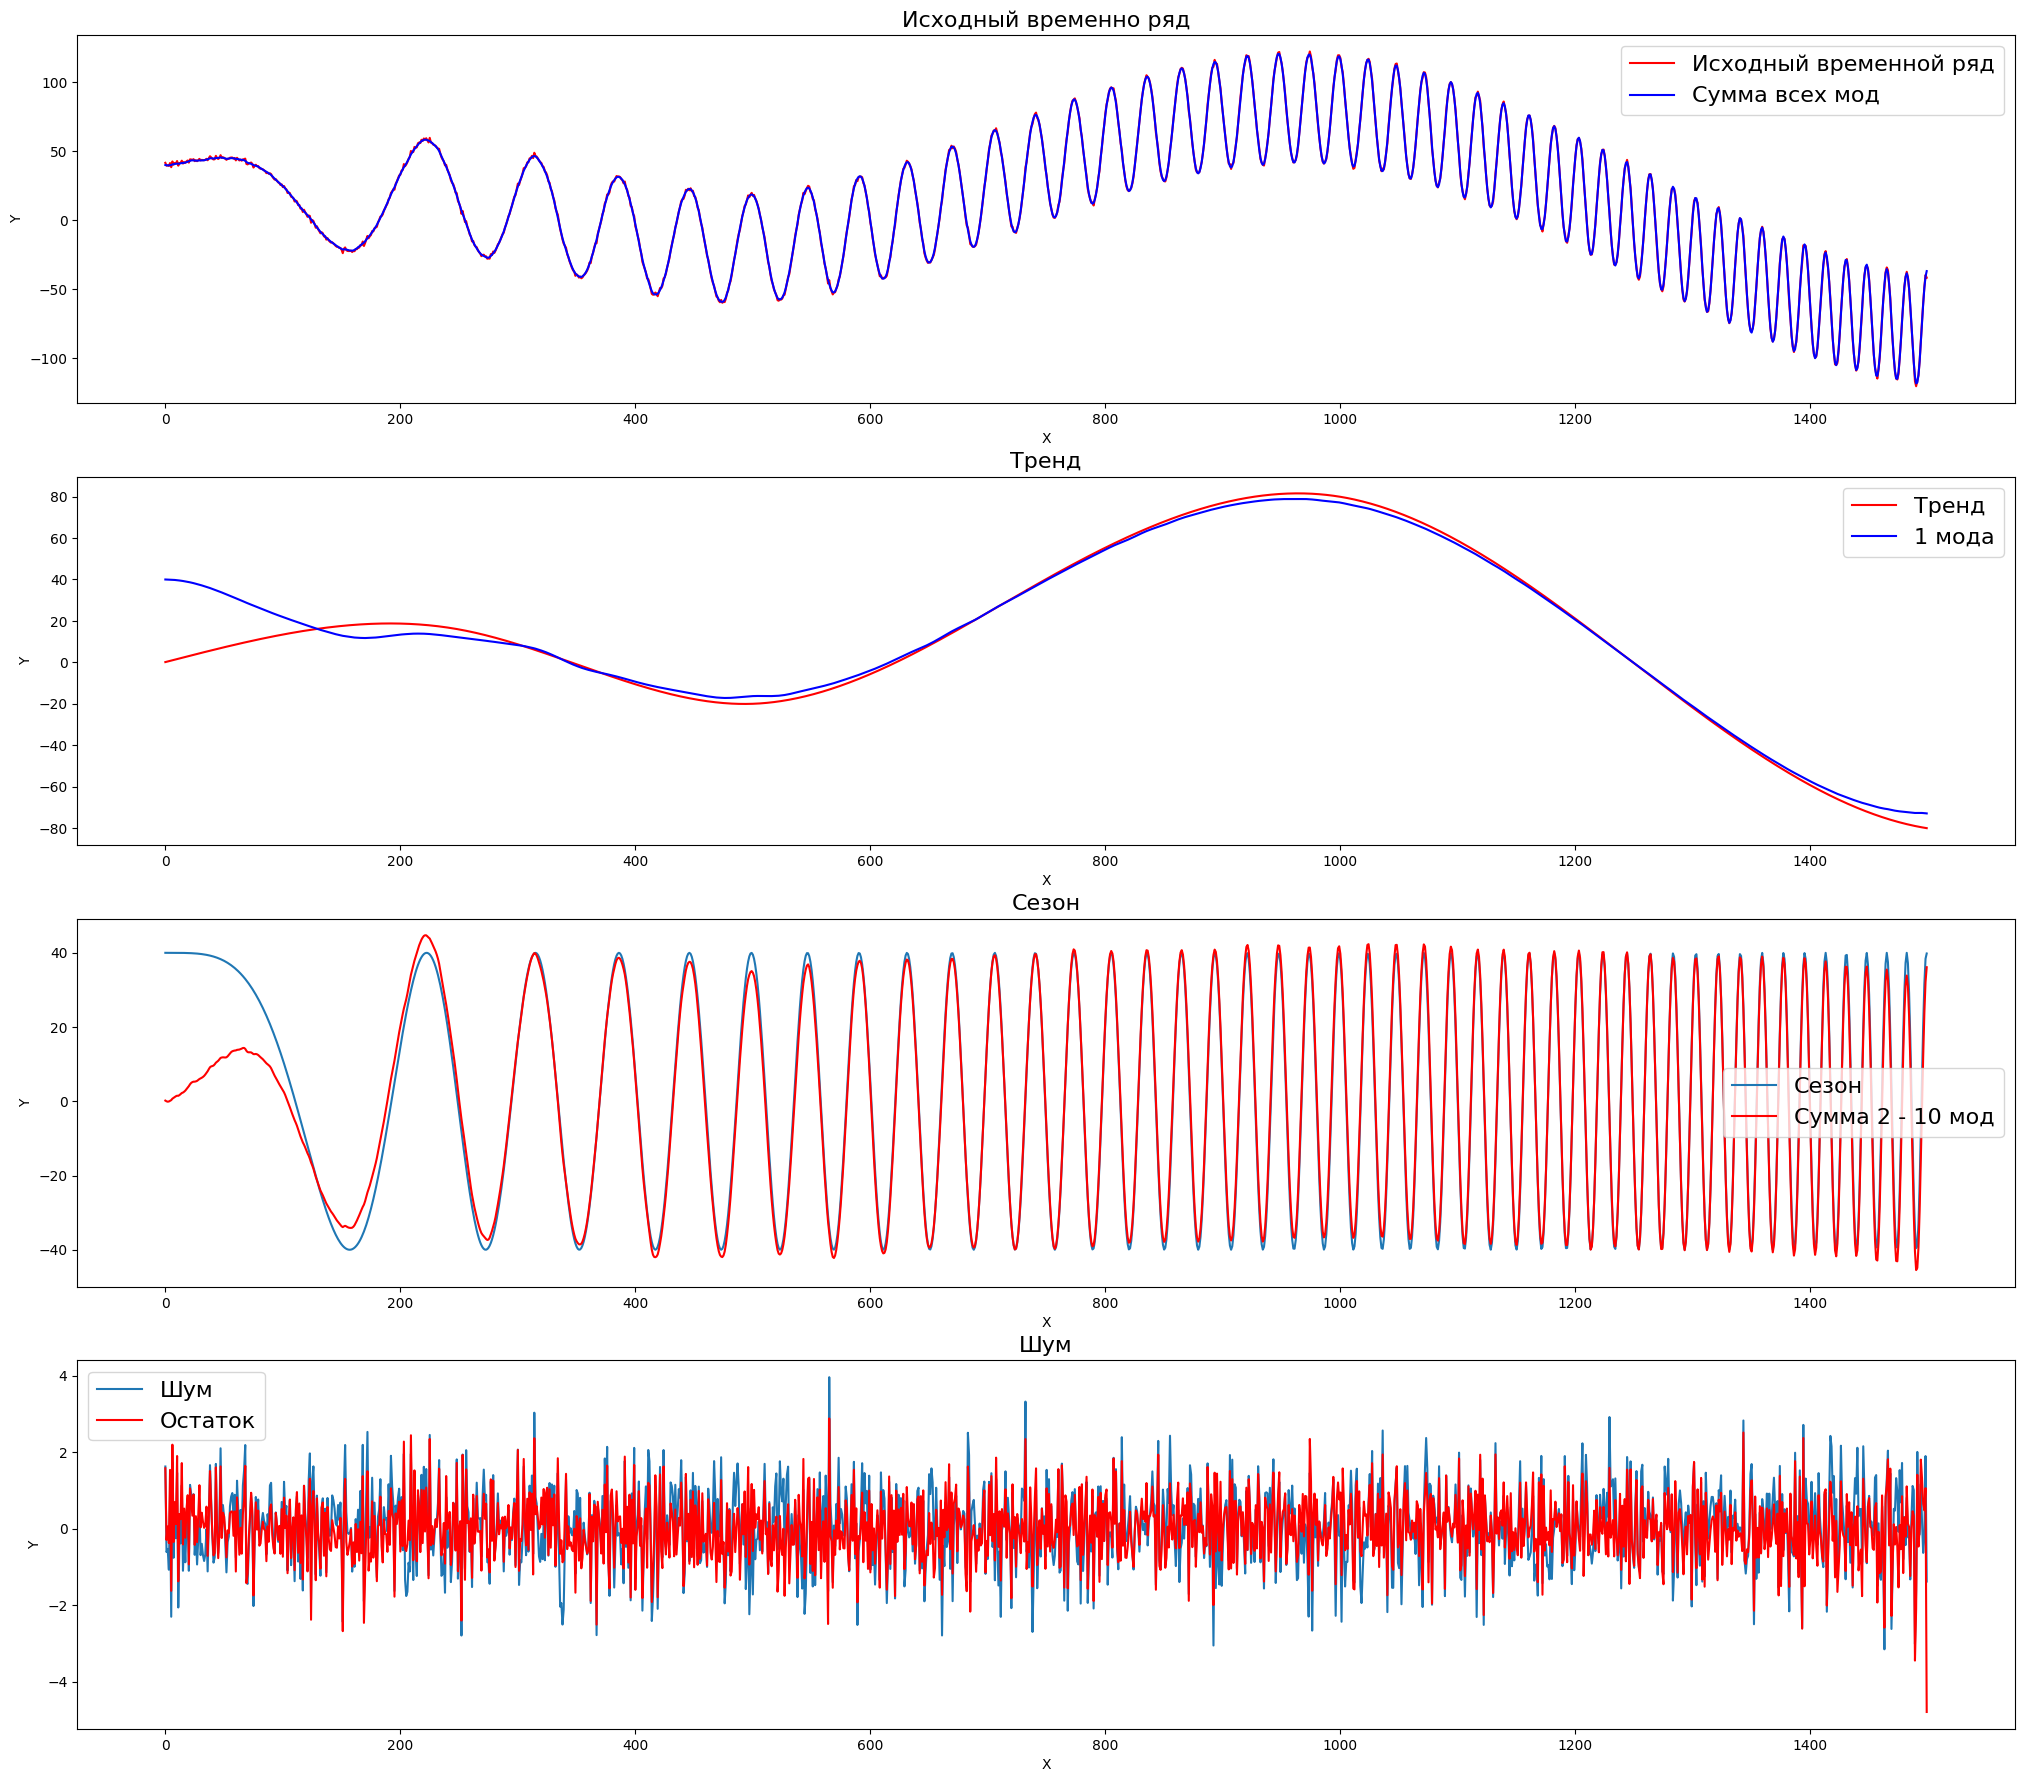

In [58]:
fig, axs = plt.subplots(figsize=(25,22), nrows=4)

sum_imfs = 0
for i in range(K):
    sum_imfs += u[i]
axs[0].plot(index, TS[3], color="#ff0000")
axs[0].plot(index, sum_imfs, color="#0000ff")
axs[0].set_title('Исходный временно ряд', fontsize=16)
axs[0].set(xlabel = 'X', ylabel='Y')
axs[0].legend(['Исходный временной ряд', 'Сумма всех мод'], prop=FontProperties(size=16))

t = pd.read_csv(f"{path1}Components{path2}t4.csv", decimal=',')
trend = pd.DataFrame(t, dtype=float)
Component_of_TS = trend['Value']
sum_imfs = 0
for i in range(1):
    sum_imfs += u[i]
axs[1].plot(index, Component_of_TS, color="#ff0000")
axs[1].plot(index, sum_imfs, color="#0000ff")
axs[1].set_title('Тренд', fontsize=16)
axs[1].set(xlabel = 'X', ylabel='Y')
axs[1].legend(['Тренд', '1 мода'], prop=FontProperties(size=16))


sum_imfs = 0
for i in range(1, 10):
    sum_imfs += u[i]
s = pd.read_csv(f"{path1}Components{path2}s10.csv", decimal=',')
season = pd.DataFrame(s, dtype=float)
Component_of_TS = season['Value']
axs[2].plot(index, Component_of_TS)
axs[2].plot(index, sum_imfs, color="#ff0000")
axs[2].set_title('Сезон', fontsize=16)
axs[2].set(xlabel = 'X', ylabel='Y')
axs[2].legend(['Сезон', 'Сумма 2 - 10 мод'], prop=FontProperties(size=16))


n = pd.read_csv(f"{path1}Components{path2}n1.csv", decimal=',')
noise = pd.DataFrame(n, dtype=float)
Component_of_TS = noise['Value']
sum_imfs = 0
for i in range(10):
    sum_imfs += u[i]
residual = TS[3].T[0] - sum_imfs
axs[3].plot(index, Component_of_TS)
axs[3].plot(index, residual, color="#ff0000")
axs[3].set_title('Шум', fontsize=16)
axs[3].set(xlabel = 'X', ylabel='Y')
axs[3].legend(['Шум', 'Остаток'], prop=FontProperties(size=16))


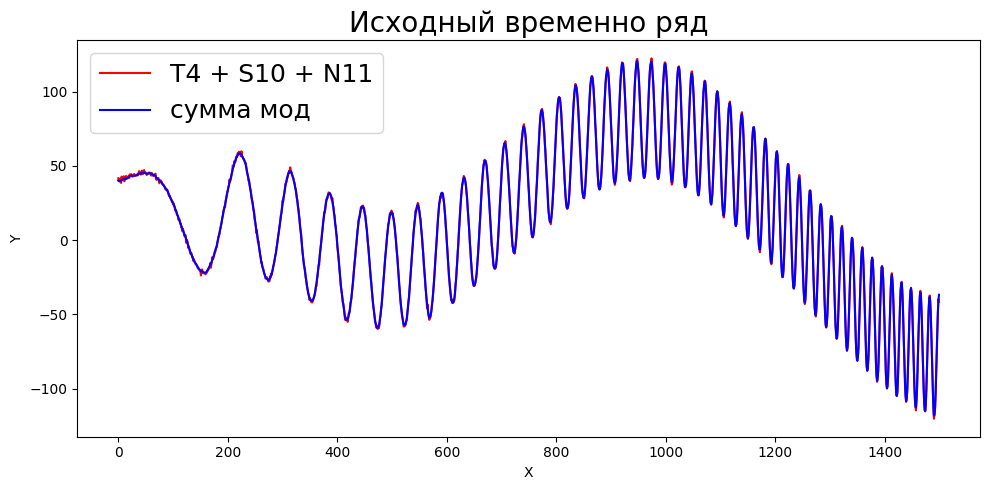

In [8]:
fig, axs = plt.subplots(figsize=(10,5), nrows=1)


sum_imfs = 0
for i in range(K):
    sum_imfs += u[i]


axs.plot(index, TS[3], color="#ff0000")
axs.plot(index, sum_imfs, color="#0000ff")
plt.title('Исходный временно ряд', fontsize=20)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['T4 + S10 + N11', 'сумма мод'], prop=FontProperties(size=18))

plt.tight_layout()

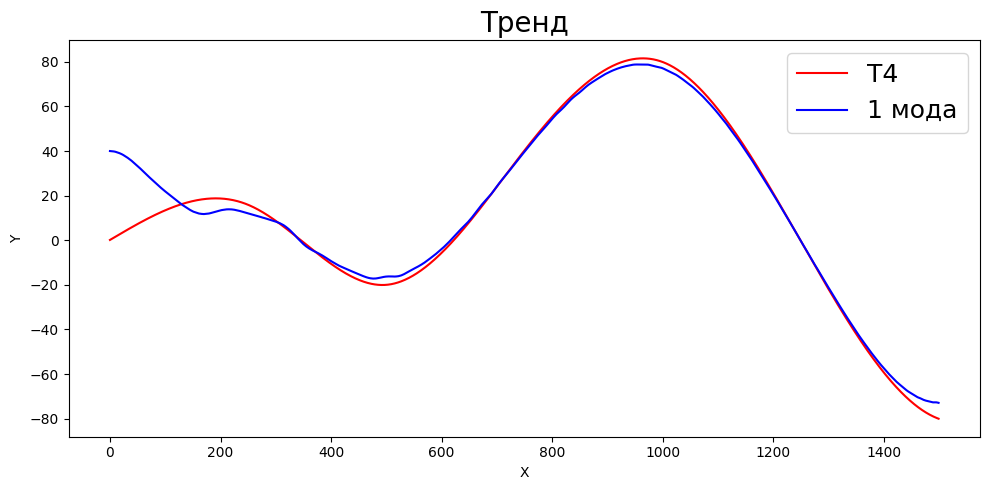

In [9]:
t = pd.read_csv(f"{path1}Components{path2}t4.csv", decimal=',')
trend = pd.DataFrame(t, dtype=float)
Component_of_TS = trend['Value']


fig, axs = plt.subplots(figsize=(10,5), nrows=1)

sum_imfs = 0
for i in range(1):
    sum_imfs += u[i]


axs.plot(index, Component_of_TS, color="#ff0000")
axs.plot(index, sum_imfs, color="#0000ff")
plt.title('Тренд', fontsize=20)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['Т4', '1 мода'], prop=FontProperties(size=18))

plt.tight_layout()

In [24]:
r2_score(sum_imfs, Component_of_TS)

0.9645519095703088

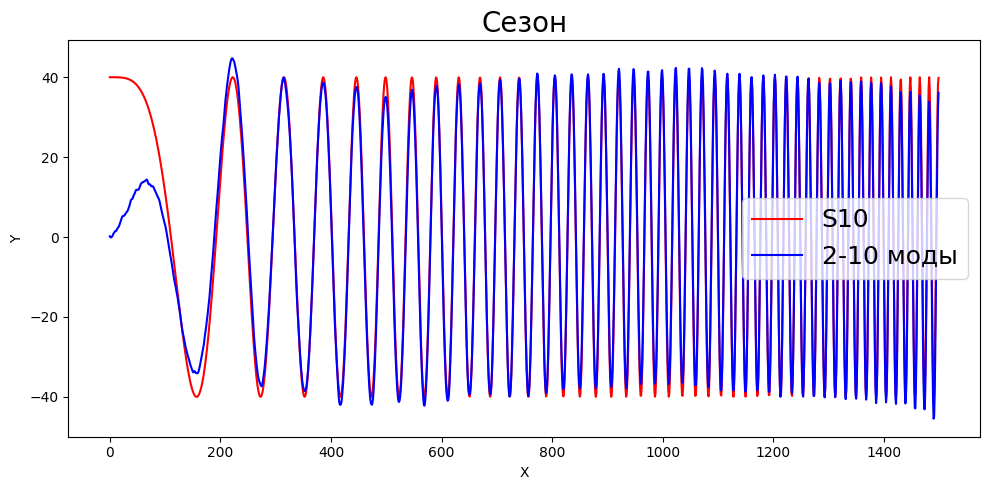

In [11]:
s = pd.read_csv(f"{path1}Components{path2}s10.csv", decimal=',')
season = pd.DataFrame(s, dtype=float)
Component_of_TS = season['Value']


fig, axs = plt.subplots(figsize=(10,5), nrows=1)

sum_imfs = 0
for i in range(1,10):
    sum_imfs += u[i]


axs.plot(index, Component_of_TS, color="#ff0000")
axs.plot(index, sum_imfs, color="#0000ff")
plt.title('Сезон', fontsize=20)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['S10', '2-10 моды'], prop=FontProperties(size=18))

plt.tight_layout()

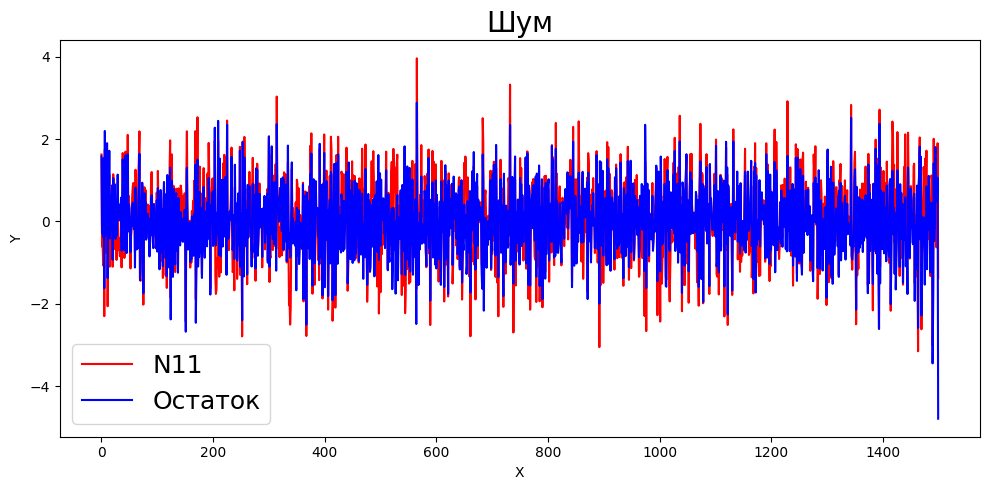

In [13]:
n = pd.read_csv(f"{path1}Components{path2}n1.csv", decimal=',')
noise = pd.DataFrame(n, dtype=float)
Component_of_TS = noise['Value']


fig, axs = plt.subplots(figsize=(10,5), nrows=1)

sum_imfs = 0
for i in range(K):
    sum_imfs += u[i]
residual = TS[3].T[0] - sum_imfs


axs.plot(index, Component_of_TS, color="#ff0000")
axs.plot(index, residual, color="#0000ff")
plt.title('Шум', fontsize=20)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['N11', 'Остаток'], prop=FontProperties(size=18))

plt.tight_layout()

In [254]:
r2_score(Component_of_TS, residual)

0.7470828325007999

# декомпозиция временного ряда

In [ ]:
alpha = (0, 500, 1000, 2500, 5000, 7500, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000)
init = (0, 1, 2)
DC = (False, True)
K = 10

tau = 0            #BY DEFAULT  
tol = 1e-6         #BY DEFAULT

featurecount = 6

In [103]:
list(product(alpha, DC, init))

[(0, False, 0),
 (0, False, 1),
 (0, False, 2),
 (0, False, 3),
 (0, False, 4),
 (0, False, 5),
 (0, False, 6),
 (0, False, 7),
 (0, False, 8),
 (0, False, 9),
 (0, False, 10),
 (0, True, 0),
 (0, True, 1),
 (0, True, 2),
 (0, True, 3),
 (0, True, 4),
 (0, True, 5),
 (0, True, 6),
 (0, True, 7),
 (0, True, 8),
 (0, True, 9),
 (0, True, 10),
 (500, False, 0),
 (500, False, 1),
 (500, False, 2),
 (500, False, 3),
 (500, False, 4),
 (500, False, 5),
 (500, False, 6),
 (500, False, 7),
 (500, False, 8),
 (500, False, 9),
 (500, False, 10),
 (500, True, 0),
 (500, True, 1),
 (500, True, 2),
 (500, True, 3),
 (500, True, 4),
 (500, True, 5),
 (500, True, 6),
 (500, True, 7),
 (500, True, 8),
 (500, True, 9),
 (500, True, 10),
 (1000, False, 0),
 (1000, False, 1),
 (1000, False, 2),
 (1000, False, 3),
 (1000, False, 4),
 (1000, False, 5),
 (1000, False, 6),
 (1000, False, 7),
 (1000, False, 8),
 (1000, False, 9),
 (1000, False, 10),
 (1000, True, 0),
 (1000, True, 1),
 (1000, True, 2),
 (1000

In [104]:
best_metriks = np.zeros(len(TS), dtype=dict)

best_r2_params = np.zeros(len(TS), dtype=dict)
best_r2_adj_params = np.zeros(len(TS), dtype=dict)
best_aic_params = np.zeros(len(TS), dtype=dict)
best_bic_params = np.zeros(len(TS), dtype=dict)

for i in range(len(TS)):
    best_metriks[i] = {"Time Series": f"TS{i+1}", "R2": -np.inf, "R2_Adj": -np.inf, "AIC" : np.inf, "BIC": np.inf}
    
    best_r2_params[i] = ({"Time Series": f"TS{i+1}", "Metric": "R2", "K": 10, "alpha": 0, "DC": False, "init": 0, "IMFs" : "1"}) 
    best_r2_adj_params[i] = ({"Time Series": f"TS{i+1}", "Metric": "R2_Adj", "K": 10, "alpha": 0,  "DC": False, "init": 0, "IMFs" : "1"}) 
    best_aic_params[i] = ({"Time Series": f"TS{i+1}", "Metric": "AIC", "K": 10, "alpha": 0, "DC": False, "init": 0, "IMFs" : "1"}) 
    best_bic_params[i] = ({"Time Series": f"TS{i+1}", "Metric": "BIC", "K": 10, "alpha": 0, "DC": False, "init": 0, "IMFs" : "1"}) 



In [105]:
alpha_j = np.zeros(len(alpha)*len(init)*len(DC), dtype=int)
init_j = np.zeros(len(alpha)*len(init)*len(DC), dtype=int)
DC_j = np.zeros(len(alpha)*len(init)*len(DC), dtype=bool)

j = 0
for params_set in list(product(alpha, DC, init)):
    alpha_j[j] = params_set[0]
    DC_j[j] = params_set[1]
    init_j[j] = params_set[2]
    
    j+=1

In [97]:
r2_list = np.zeros((len(TS) ,(len(alpha)*len(DC)*len(init)), 2), dtype=float)
r2_adj_list = np.zeros((len(TS) ,(len(alpha)*len(DC)*len(init)), 2), dtype=float)
aic_list = np.zeros((len(TS) ,(len(alpha)*len(DC)*len(init)), 2), dtype=float)
bic_list = np.zeros((len(TS) ,(len(alpha)*len(DC)*len(init)), 2), dtype=float)

# для всех лчм
for ts_i in range(len(TS)):

    j=0
    # для всех наборов параметров
    for params_set in list(product(alpha, DC, init)):
        u, u_hat, omega = VMD(TS[ts_i], alpha=params_set[0], tau=tau, K=K, DC=params_set[1], init=params_set[2], tol=tol)
        
        r2 = list()
        r2_adj = list()
        aic = list()
        bic = list()
        sum_of_imfs = 0
        for i_imfs in range_of_imfs:
            sum_of_imfs += u[i_imfs].T
            
            # для шума
            residual = TS[ts_i].T[0] - sum_of_imfs
            r2.append(r2_score(Component_of_TS[ts_i], residual))
            r2_adj.append(r2_score_adjusted(Component_of_TS[ts_i], residual, featurecount))
            aic.append(calculate_aic(Component_of_TS[ts_i], residual, featurecount))
            bic.append(calculate_bic(Component_of_TS[ts_i], residual, featurecount))

            # для тренда и сезона
            # r2.append(r2_score(Component_of_TS[ts_i], sum_of_imfs))
            # r2_adj.append(r2_score_adjusted(Component_of_TS[ts_i], sum_of_imfs, featurecount))
            # aic.append(calculate_aic(Component_of_TS[ts_i], sum_of_imfs, featurecount))
            # bic.append(calculate_bic(Component_of_TS[ts_i], sum_of_imfs, featurecount))

        r2_list[ts_i][j] = [np.max(r2), np.argmax(r2)]
        r2_adj_list[ts_i][j] = [np.max(r2_adj), np.argmax(r2_adj)]
        aic_list[ts_i][j] = [np.min(aic), np.argmin(aic)]
        bic_list[ts_i][j] = [np.min(bic), np.argmin(bic)]

        j+=1



c:\Users\George\VS Code Projects\TS Generator\про лчм\vmd.py:67: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(freqs[T//2:T],(abs(u_hat_plus[n+1, T//2:T, k])**2))/np.sum(abs(u_hat_plus[n+1,T//2:T,k])**2)
c:\Users\George\VS Code Projects\TS Generator\про лчм\vmd.py:64: RuntimeWarning: invalid value encountered in divide
  return (f_hat_plus - sum_uk - lambda_hat[n,:]/2)/(1.+Alpha[k]*(freqs - omega_plus[n,k])**2)
c:\Users\George\VS Code Projects\TS Generator\про лчм\vmd.py:67: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(freqs[T//2:T],(abs(u_hat_plus[n+1, T//2:T, k])**2))/np.sum(abs(u_hat_plus[n+1,T//2:T,k])**2)
c:\Users\George\VS Code Projects\TS Generator\про лчм\vmd.py:64: RuntimeWarning: invalid value encountered in divide
  return (f_hat_plus - sum_uk - lambda_hat[n,:]/2)/(1.+Alpha[k]*(freqs - omega_plus[n,k])**2)
c:\Users\George\VS Code Projects\TS Generator\про лчм\vmd.py:67: RuntimeWarning: invalid value encountered in sc

In [98]:
r2 = np.zeros((len(alpha)*len(DC)*len(init), 2), dtype=float)
r2_adj = np.zeros((len(alpha)*len(DC)*len(init), 2), dtype=float)
aic = np.zeros((len(alpha)*len(DC)*len(init), 2), dtype=float)
bic = np.zeros((len(alpha)*len(DC)*len(init), 2), dtype=float)

for ts_i in range(len(TS)):

    r2 = np.transpose(r2_list[ts_i])
    max_r2 = np.max(r2[0])
    argmax_r2 = np.argmax(r2[0])
    i_imfs = int(r2[1][argmax_r2])
    if (max_r2 > best_metriks[ts_i]["R2"]):
        best_metriks[ts_i]["R2"] = max_r2
        
        best_r2_params[ts_i]["alpha"] = alpha_j[argmax_r2]
        best_r2_params[ts_i]["DC"] = DC_j[argmax_r2]
        best_r2_params[ts_i]["init"] = init_j[argmax_r2]
        best_r2_params[ts_i]["IMFs"] = f'{range_of_imfs[0]+1} + {i_imfs}'


    r2_adj = np.transpose(r2_adj_list[ts_i])
    max_r2_adj = np.max(r2_adj[0])
    argmax_r2_adj = np.argmax(r2_adj[0])
    i_imfs = int(r2_adj[1][argmax_r2_adj])
    if (max_r2_adj > best_metriks[ts_i]["R2_Adj"]):
        best_metriks[ts_i]["R2_Adj"] = max_r2_adj

        best_r2_adj_params[ts_i]["alpha"] = alpha_j[argmax_r2_adj]
        best_r2_adj_params[ts_i]["DC"] = DC_j[argmax_r2_adj]
        best_r2_adj_params[ts_i]["init"] = init_j[argmax_r2_adj]
        best_r2_adj_params[ts_i]["IMFs"] = f'{range_of_imfs[0]+1} + {i_imfs}'


    aic = np.transpose(aic_list[ts_i])
    min_aic = np.min(aic[0])
    argmin_aic = np.argmin(aic[0])
    i_imfs = int(aic[1][argmin_aic])
    if (min_aic < best_metriks[ts_i]["AIC"]):
        best_metriks[ts_i]["AIC"] = min_aic

        best_aic_params[ts_i]["alpha"] = alpha_j[argmin_aic]
        best_aic_params[ts_i]["DC"] = DC_j[argmin_aic]
        best_aic_params[ts_i]["init"] = init_j[argmin_aic]

        best_aic_params[ts_i]["IMFs"] = f'{range_of_imfs[0]+1} + {i_imfs}'

    bic = np.transpose(bic_list[ts_i])
    min_bic = np.min(bic[0])
    argmin_bic = np.argmin(bic[0])
    i_imfs = int(bic[1][argmin_bic])
    if (min_bic < best_metriks[ts_i]["BIC"]):
        best_metriks[ts_i]["BIC"] = min_bic

        best_bic_params[ts_i]["alpha"] = alpha_j[argmin_bic]
        best_bic_params[ts_i]["DC"] = DC_j[argmin_bic]
        best_bic_params[ts_i]["init"] = init_j[argmin_bic]

        best_bic_params[ts_i]["IMFs"] = f'{range_of_imfs[0]+1} + {i_imfs}'



# метрики точности и параметры с выводом

In [99]:
for ts_i in range(len(TS)):
    best_metriks[ts_i]["BIC"] = format(best_metriks[ts_i]["BIC"], ".5f")
    best_metriks[ts_i]["AIC"] = format(best_metriks[ts_i]["AIC"], ".5f")
    best_metriks[ts_i]["R2_Adj"] = format(best_metriks[ts_i]["R2_Adj"], ".5f")
    best_metriks[ts_i]["R2"] = format(best_metriks[ts_i]["R2"], ".5f")

In [100]:
filename = f"{path1}Output{path2}Best_Metriks-{Component_name}.csv"

fields = best_metriks[0].keys()
fields = list(fields)

with open(filename, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=fields)
    writer.writeheader()  # Write header row
    for ts_i in range(len(TS)):
        writer.writerows([best_metriks[ts_i]])  # Write data rows

In [101]:
filename = f"{path1}Output{path2}Parameters-{Component_name}.csv"

fields = best_r2_params[0].keys()
fields = list(fields)

with open(filename, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=fields)
    writer.writeheader()  # Write header row
    for ts_i in range(len(TS)):
        writer.writerows([best_r2_params[ts_i]])  # Write data rows
        writer.writerows([best_r2_adj_params[ts_i]])  # Write data rows
        writer.writerows([best_aic_params[ts_i]])  # Write data rows
        writer.writerows([best_bic_params[ts_i]])  # Write data rows

